# starting project

In [63]:
import os
import cv2
import time
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
import numpy as np

## Loading data

In [2]:
mnist=tf.keras.datasets.mnist

In [15]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [19]:
y_test.shape

(10000,)

In [9]:
x_train=x_train.reshape(60000,-1)

In [ ]:
x_test=x_test.reshape(60000)

In [5]:
# Normalizing the data

In [20]:
x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)

# Creating the layers

In [59]:
model4=Sequential()

In [60]:
model4.add(Flatten(input_shape=(28,28)))

In [61]:
model4.add(Dense(784,activation="relu"))
model4.add(Dropout(0.5))
model4.add(Dense(512,activation="relu"))
model4.add(Dropout(0.5))
model4.add(Dense(256,activation="relu"))
model4.add(Dense(128,activation="relu"))
model4.add(Dropout(0.5))
model4.add(Dense(64,activation="relu"))
model4.add(Dense(32,activation="relu"))
model4.add(Dense(10,activation="softmax"))

In [62]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 784)               615440    
                                                                 
 dropout_3 (Dropout)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dense_16 (Dense)            (None, 128)              

## Training Model

In [64]:
start=time.time()
model4.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
model4.fit(x_train,y_train,epochs=10)
end=time.time()
print("time taken",start-end)

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4802 - accuracy: 0.8585
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2327 - accuracy: 0.9394
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1840 - accuracy: 0.9520
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1596 - accuracy: 0.9590
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1433 - accuracy: 0.9631
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1325 - accuracy: 0.9656
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1213 - accuracy: 0.9685
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1121 - accuracy: 0.9706
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1065 - accuracy: 0.9730
Epoch 10/10
1875/1875 [==============================] - 21s 11m

## Testing Model

In [65]:
loss,accuracy=model4.evaluate(x_test,y_test)
print("Accuracy: ",accuracy)
print("Loss: ",loss)

313/313 [==============================] - 2s 4ms/step - loss: 0.0927 - accuracy: 0.9766
Accuracy:  0.9765999913215637
Loss:  0.09265339374542236


## Trying on random values

1/1 [==============================] - 0s 105ms/step
the digit is 4


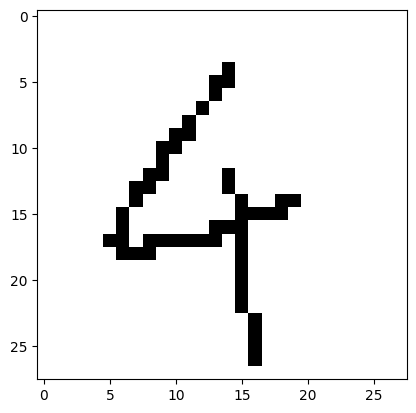

1/1 [==============================] - 0s 9ms/step
the digit is 2


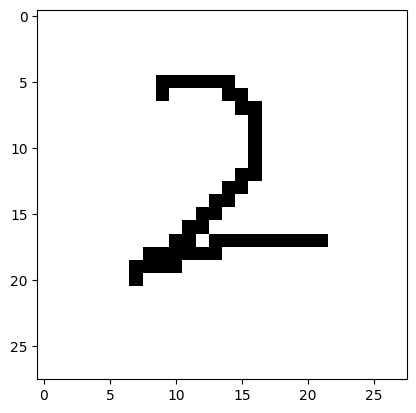

1/1 [==============================] - 0s 19ms/step
the digit is 3


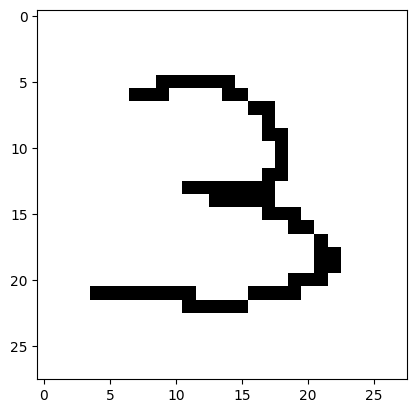

1/1 [==============================] - 0s 34ms/step
the digit is 4


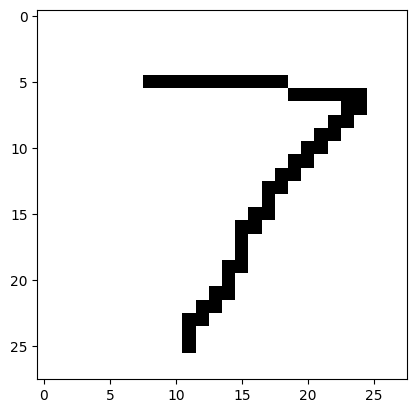

1/1 [==============================] - 0s 39ms/step
the digit is 3


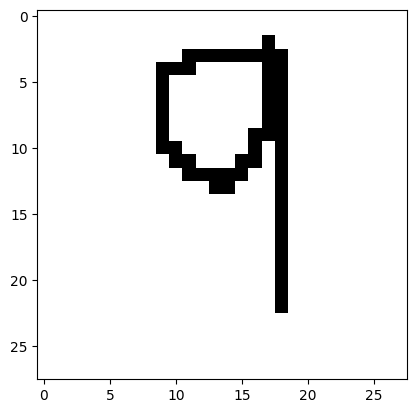

1/1 [==============================] - 0s 20ms/step
the digit is 7


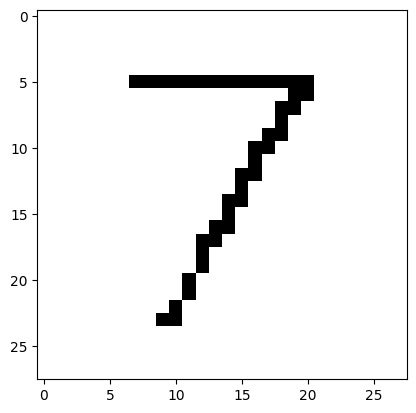

1/1 [==============================] - 0s 16ms/step
the digit is 8


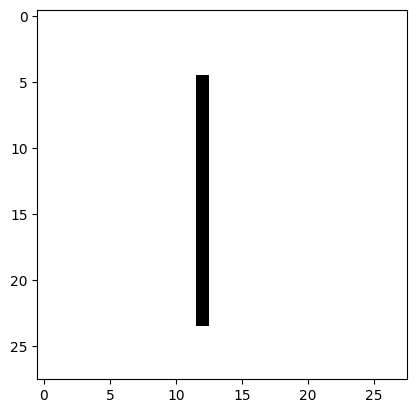

1/1 [==============================] - 0s 27ms/step
the digit is 1


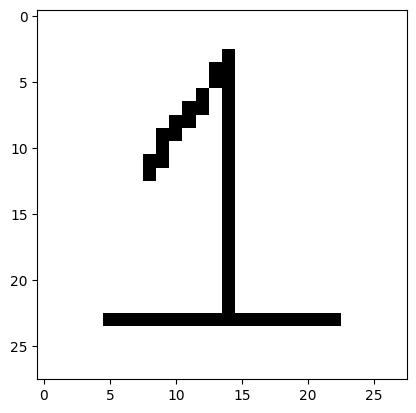

1/1 [==============================] - 0s 33ms/step
the digit is 4


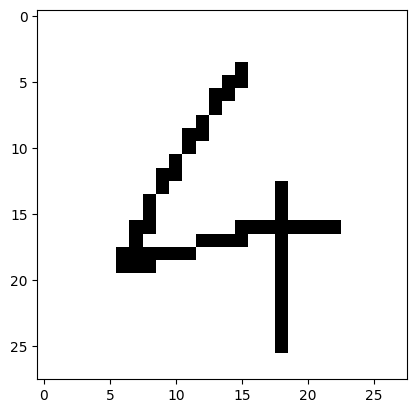

1/1 [==============================] - 0s 39ms/step
the digit is 6


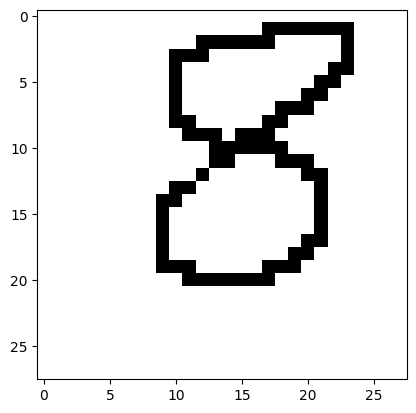

1/1 [==============================] - 0s 34ms/step
the digit is 3


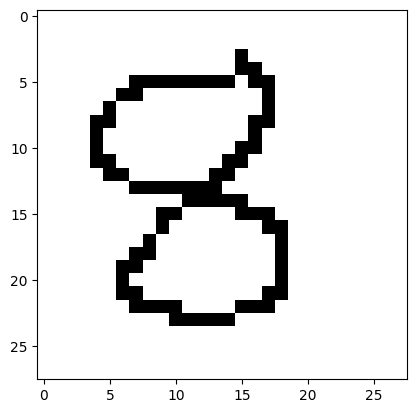

1/1 [==============================] - 0s 31ms/step
the digit is 3


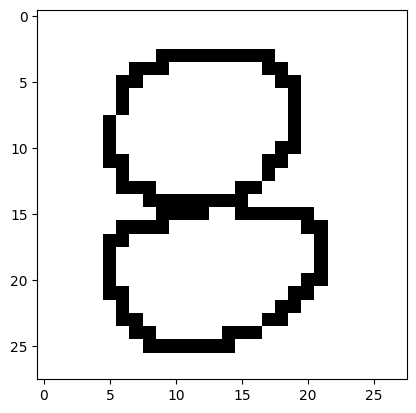

1/1 [==============================] - 0s 46ms/step
the digit is 3


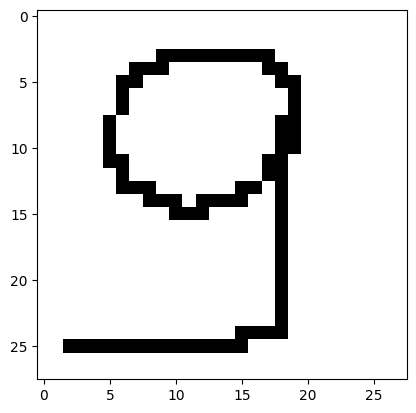

1/1 [==============================] - 0s 23ms/step
the digit is 3


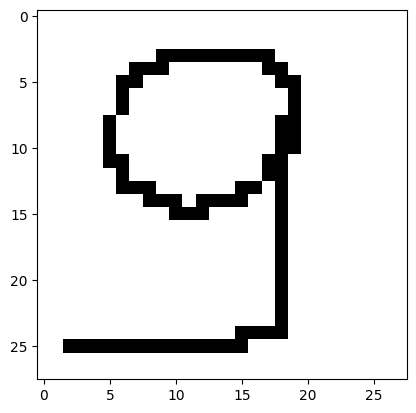

1/1 [==============================] - 0s 19ms/step
the digit is 7


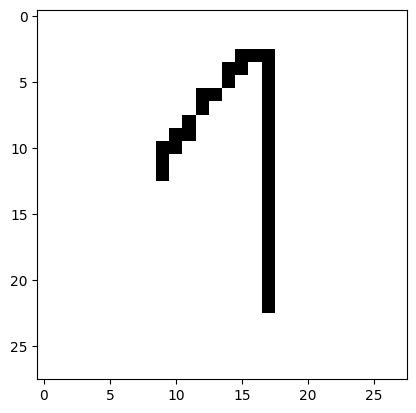

1/1 [==============================] - 0s 34ms/step
the digit is 2


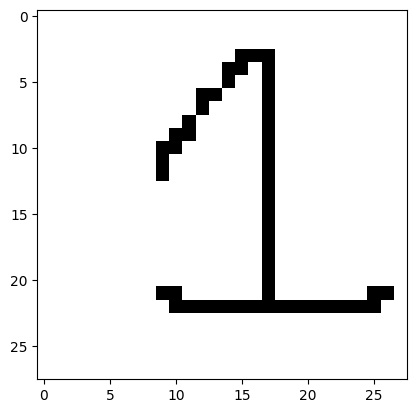

1/1 [==============================] - 0s 42ms/step
the digit is 7


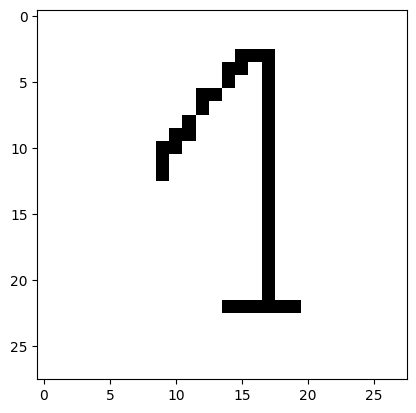

1/1 [==============================] - 0s 34ms/step
the digit is 7


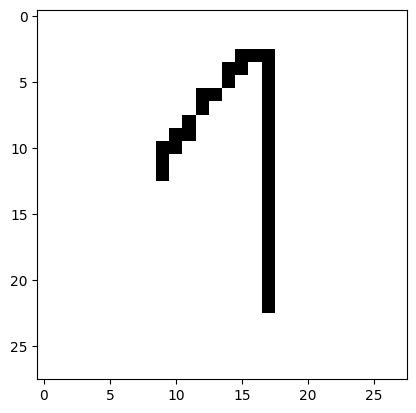

1/1 [==============================] - 0s 38ms/step
the digit is 2


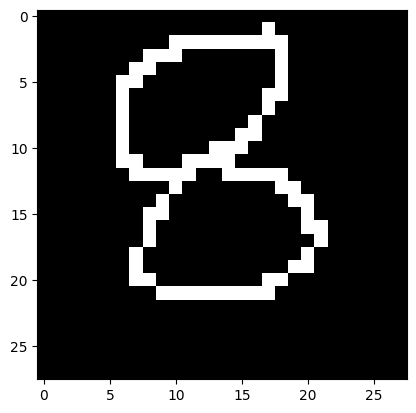

In [66]:
image_number=1
while os.path.isfile(f"image/digit{image_number}.png"):
    try:
        img=cv2.imread(f"image/digit{image_number}.png")[:,:,0]
        img=np.invert(np.array([img]))
        prediction=model4.predict(img)
        print(f"the digit is {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("error")
    finally:
        image_number+=1